<h1><center>Proyecto 2: <font color=blue>Pandas Project</font></center></h1>
<center><img src=https://animals.sandiegozoo.org/sites/default/files/styles/image_grid_full_width/public/2017-04/%20leopard_shark_01.jpg style="width: 500px;">
<h2><center>Sergio

#  Conociendo los datos
Objetivo:
- Conocer la cantidad de valores del df, analizar las columnas, observar errores y empezar a pensar en soluciones.


## Importamos bibliotecas

In [261]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Abrimos el archivo 

In [2]:
df=pd.read_csv("data/GSAF5.csv",encoding="ISO-8859-1")

## Informacion inicial del archivo

### Observacion inicial del dataset 

In [3]:
df.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,...,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,5988,NaN,NaN
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,NaN,NaN
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,NaN,NaN
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,...,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,2016.09.06,5985,NaN,NaN
9,2016.09.05.b,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,...,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,2016.09.05.b,5984,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object
 14  Species                 3058 non-null   object
 15  Inve

In [5]:
#Valores nulos
df.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [6]:
#Vamos a ver si hay algun duplicado en los valores
df.duplicated().value_counts()

False    5992
dtype: int64

In [7]:
df.shape

(5992, 24)

### Conclusiones iniciales tras Analisis inicial:


- Columnas con un mismo valor como case number (0,19,20) y original order: Comprobar diferencias y si son iguales borrar
- Se solapan las columnas Year y Date: Agruparla en una.
- En algunos casos los datos de la columna nombre se solapan con el sexo: Buscar solucion
- Las columnas pdf, href formula y href se solapan, intentar agrupar en una
- original order posible indice

#  Modificacion del dataset
Analisis de cada columna, valores nulos, errores y soluciones

### Columna: "original order","Case Number","Case Number.1","Case Number.2"

- La columna original order es un indice de casos en los que se repiten valores igual que las columnas Case Number
- Objetivo: Unica lista de numero de casos: lista con valores unicos y continuos
- Output: Nueva columna que usare de indice


In [8]:
df[["original order","Case Number","Case Number.1","Case Number.2"]]

,original order,Case Number,Case Number.1,Case Number.2
0,5993,2016.09.18.c,2016.09.18.c,2016.09.18.c
1,5992,2016.09.18.b,2016.09.18.b,2016.09.18.b
2,5991,2016.09.18.a,2016.09.18.a,2016.09.18.a
3,5990,2016.09.17,2016.09.17,2016.09.17
4,5989,2016.09.15,2016.09.16,2016.09.15
...,...,...,...,...
5987,6,ND.0005,ND.0005,ND.0005
5988,5,ND.0004,ND.0004,ND.0004
5989,4,ND.0003,ND.0003,ND.0003
5990,3,ND.0002,ND.0002,ND.0002


#### Analisis de original order

In [9]:
#ordeno la tabla por los valores original order
df.sort_values("original order",ascending=True,inplace=True)
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5991,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN


In [10]:
#Vamos a ver que valoers faltan
df["original order"].nunique()

5988

In [11]:
#Vamos a comprobar cuantos valores se repiten 
OE_ValoresRepetidos=len(df["original order"])-df["original order"].nunique()

In [12]:
#Comprobamos QUE valores se repiten
df["original order"].value_counts().head(OE_ValoresRepetidos)

5739    2
569     2
5661    2
3847    2
Name: original order, dtype: int64

In [13]:
#Comprobamos desde el 0 al numero de casos, que valores no estan, lopaso a index ya que me resuta mas facil
df2=df.set_index("original order")
for i in range(0,len(df2)):
    try:
        df2.loc[i]
    except KeyError:
        print(i)

0
1
571
3347
5724
5881


Problema de original order: 4 numeros repetidos y en el orden de casos se han saltado varios numeros
Opciones para corregirlo:
- Opcion A: Cambios en la misma columna:
        - del 2 al 568 correcto, pasamos el segundo valor 569 al 570 
        - del 571 al 3346 correcto, del3348 al primer valor 3847 hay que restarle 1
        - del 3848 al 5660 correcto, del segundo valor del 5661 a 5723 hay que sumarle 1
        - del 5725 a 5738 correcto, del segundo valor de 5739 al 5880 hay que sumarle 1
        - despues restamos 1 a todo y los casos empezaran desde 1 siendo valores unicos
- Opcion B:
        - ponerlo en orden y crear una nueva tabla con un rango de 1 a len

In [14]:
#cambio el indice con una lista de numeros desde el 1 hasta la longitud +1
lista=[i for i in range(1,len(df)+1)]


In [15]:
# añado la columna nueva y borro la antigua
df["Casos"]=lista
df.drop("original order",axis=1,inplace=True)

#### Analisis Case Number

In [16]:
#Cambio el indice a original a Casos 
df=df.set_index("Casos")

In [17]:
#Miramos cantidad de valores nulos
df[["Case Number","Case Number.1","Case Number.2"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 1 to 5992
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Case Number    5992 non-null   object
 1   Case Number.1  5992 non-null   object
 2   Case Number.2  5992 non-null   object
dtypes: object(3)
memory usage: 187.2+ KB


In [18]:
#Valores unicos que hay
df[["Case Number","Case Number.1","Case Number.2"]].nunique()

Case Number      5976
Case Number.1    5975
Case Number.2    5976
dtype: int64

In [19]:
#No hay valores nulos pero hay valores que se repiten y el formato de numero de caso varia
print(f'{len(df["Case Number"])-len(set(df["Case Number"]))} casos se repiten')

16 casos se repiten


In [20]:
#Vamos a ver que valores se repiten en Case Number y si son los mismos en 
listaA=[] #Lista de valores unicos de Case Number
listaB=[] #Lista de valores repetidos de Case Number
for i in range(1,len(df)+1):
    if df["Case Number"].loc[i] not in listaA:
        listaA.append(df["Case Number"].loc[i])
    else:
        listaB.append(df["Case Number"].loc[i])

In [21]:
#Vamos a ver que valores se repiten en Case Number.1 y si son los mismos en 
listaC=[] #Lista de valores unicos de Case Number.1
listaD=[] #Lista de valores repetidos de Case Number.1
for i in range(1,len(df)+1):
    if df["Case Number.1"].loc[i] not in listaC:
        listaC.append(df["Case Number.1"].loc[i])
    else:
        listaD.append(df["Case Number.1"].loc[i])

In [22]:
#Vamos a ver que valores se repiten en Case Number.2 y si son los mismos en 
listaE=[] #Lista de valores unicos de Case Number.2
listaF=[] #Lista de valores repetidos de Case Number.2
for i in range(1,len(df)+1):
    if df["Case Number.2"].loc[i] not in listaE:
        listaE.append(df["Case Number.2"].loc[i])
    else:
        listaF.append(df["Case Number.2"].loc[i])

In [23]:
#Vamos a comprobar que columnas son mas parecidas
print((df["Case Number"]==df["Case Number.1"]).value_counts())
print((df["Case Number.1"]==df["Case Number.2"]).value_counts())
print((df["Case Number"]==df["Case Number.2"]).value_counts())

True     5979
False      13
dtype: int64
True     5981
False      11
dtype: int64
True     5990
False       2
dtype: int64


In [24]:
#Primero unificare la columna Case Number con la columna Case Number.2 ya que son muy parecidas
print(f'Valores no repetidos {listaA==listaE}')
print(f'Valores  repetidos {listaB==listaF}')


Valores no repetidos False
Valores  repetidos True


In [25]:
#Los dos valores que no coinciden estan en los valores no repetidos
for i in range(1,len(df)):
    if df["Case Number"].loc[i]!= df["Case Number.2"].loc[i]:
          print(i)
    


1273
5823


In [26]:
#Analizamos ambos valores de forma individual
df.loc[1273]

Case Number                                                    1934.01.08.R
Date                                                   Reported 08-Feb-1934
Year                                                                   1934
Type                                                                Boating
Country                                                              TURKEY
Area                                                               Istanbul
Location                                         Haydarpasa jetty, Istanbul
Activity                                                            Fishing
Name                                                                2 males
Sex                                                                       M
Age                                                                     NaN
Injury                                                            No injury
Fatal (Y/N)                                                               N
Time        

In [27]:
df.loc[5823]

Case Number                                                      2015.07-10
Date                                                              10-Jul-15
Year                                                                   2015
Type                                                             Unprovoked
Country                                                                 USA
Area                                                             California
Location                                    Huntington Beach, Orange County
Activity                                                            Surfing
Name                                                           Danny Miskin
Sex                                                                       M
Age                                                                      38
Injury                              No injury, shark bumped & damaged board
Fatal (Y/N)                                                               N
Time        

- Problema:  
     - Case Number: A veces apuntdo por fecha o por el nombre del pdf, valores repetidos y si son el mismo dia con letras, no da informacion relevante ni utilizable ya que son parches de otras columnas

Decido borrar las columnas Case number ya que no me aportan informacion relevante y lo he unido a la columna Casos

#### Output Columnas: "original order","Case Number","Case Number.1","Case Number.2"

In [28]:
df.drop(["Case Number","Case Number.1","Case Number.2"],axis=1,inplace=True)

### Columna "unname 23"

####   analisis de los valores y conocimiento del problema

In [30]:
#Valores de Unnamed 23
set(df["Unnamed: 23"])

{'Teramo', 'change filename', nan}

In [31]:
#Cantidad de veces que salen estos valores
df["Unnamed: 23"].value_counts()

change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64

#### Conclusion y output

In [32]:
# No la considero relevante asi que decido borrarla
df.drop("Unnamed: 23",axis=1,inplace=True)

### Columna "unname 22"

#### Identificacion de valores nulos de cada columna

In [33]:
#Valores de Unnamed 22
set(df["Unnamed: 22"])

{nan, 'stopped here'}

In [34]:
#Vamos a ver cuantos valores hay
df["Unnamed: 22"].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

#### Conclusion y output

In [35]:
#El registro esta en mitad de la tabla y no lo considero importante asi que quito toda la columna 
df.drop("Unnamed: 22", axis=1,inplace=True)

###  Columnas: "Country"  

#### Analisis inicial de las columnas

In [36]:
#Observamos la cantidad de valores nulos que hay
(df["Country"]).isna().sum()

43

In [37]:
#Rellenamos los na con un grupo de "No determinado"
df["Country"].fillna("No determinado",inplace=True)

####  Limpieza de los valores:
Observo que en los inicios hay espacios, hay ?, primero limpiar los nombres y despues buscar si existe el pais
Objetivo: comprobar si existen y si no existen añadir como No determinado, antes borrar espacios iniciales y finales y quitar ?¿ç

In [38]:
#Primero lo convierto todo a mayusculas
df["Country"]=df["Country"].str.upper()


In [39]:
#Identifico los paises que empiezan con espacio y se lo quito
df[df["Country"].str.startswith(" ")]["Country"]
#Solo son PHILIPPINES Y TONGA, los modifico 
df.replace({" PHILIPPINES":"PHILIPPINES"," TONGA":"TONGA"},inplace=True)

In [40]:
#Identifico los paises que acaban con espacio y se lo quito
df[df["Country"].str.endswith(" ")]["Country"]
df.replace({"YEMEN ":"YEMEN",
            "EGYPT ":"EGYPT",
           "NORTH ATLANTIC OCEAN ":"NORTH ATLANTIC OCEAN",
           "NICARAGUA ":"NICARAGUA",
            "PACIFIC OCEAN ":"PACIFIC OCEAN",
            "MEXICO ":"MEXICO"
           },inplace=True)

In [41]:
#Identifico los valores que tienen ? y los modifico
for i in df["Country"]:
    if re.findall("[?]",i):
        print(i)

ASIA?
RED SEA?
INDIAN OCEAN?
MEDITERRANEAN SEA?
SUDAN?


In [42]:
df.replace({"ASIA?":"ASIA",
            "RED SEA?":"RED SEA",
            "INDIAN OCEAN?":"INDIAN OCEAN",
            "MEDITERRANEAN SEA?":"MEDITERRANEAN SEA",
           "SUDAN?":"SUDAN"},inplace=True)

####  Conclusion: Clasificacion por paises existentes
los nombres de los paises ya estan limpios, vamos a comprobar si existen 
[Github del csv](https://github.com/datasets/country-list/blob/master/data.csv#L119)

In [43]:
#Descargo de github un csv con todos los paises del mundo en ingles, viene con indice y codigo asi que creo una lista con los paises
lista_paises=pd.read_csv("paises.csv")
lista_paises=list(lista_paises["Name"])

In [44]:
#Convierto los nombres a mayuscula y los pongo en una lista
lista=[]
for i in lista_paises:
    lista.append(i.upper())
lista_paises=lista

In [114]:
#Vamos a ver los paises que no identifica para ver cuales podemos solucionar y cuales no
for i in set(df["Country"]):
    if i in list(lista_paises):
        continue
    else:
        print(i)

AZORES
ANTIGUA
SOLOMON ISLANDS / VANUATU
NEW GUINEA
CARIBBEAN SEA
TRINIDAD & TOBAGO
IRAN / IRAQ
CURACAO
MID ATLANTIC OCEAN
SCOTLAND
ATLANTIC OCEAN
PERSIAN GULF
CRETE
NORTHERN ARABIAN SEA
BRITISH NEW GUINEA
EGYPT / ISRAEL
CENTRAL PACIFIC
WESTERN SAMOA
GULF OF ADEN
BAY OF BENGAL
BRITISH ISLES
USA
ITALY / CROATIA
ENGLAND
DIEGO GARCIA
COAST OF AFRICA
NEW BRITAIN
PACIFIC OCEAN
FALKLAND ISLANDS
OCEAN
TASMAN SEA
INDIAN OCEAN
RED SEA / INDIAN OCEAN
FEDERATED STATES OF MICRONESIA
NORTH ATLANTIC OCEAN
VIETNAM
SYRIA
ST HELENA
PALESTINIAN TERRITORIES
BRITISH WEST INDIES
SOUTH PACIFIC OCEAN
ASIA
SOUTH ATLANTIC OCEAN
TURKS & CAICOS
MALDIVE ISLANDS
NORTH PACIFIC OCEAN
COLUMBIA
JAVA
SAN DOMINGO
RUSSIA
CEYLON (SRI LANKA)
SOUTH CHINA SEA
UNITED ARAB EMIRATES (UAE)
THE BALKANS
EQUATORIAL GUINEA / CAMEROON
BRITISH VIRGIN ISLANDS
MEDITERRANEAN SEA
BURMA
KOREA
BETWEEN PORTUGAL & INDIA
MID-PACIFC OCEAN
NETHERLANDS ANTILLES
BAHREIN
NORTH SEA
GRAND CAYMAN
ADMIRALTY ISLANDS
OKINAWA
REUNION
NEVIS
SOUTHWEST PACIF

**MODIFICACIONES sobre la lista de paises que no aparecen** {Como salen: Transformacion} (ND=no determinado)
1. CEYLON (SRI LANKA): SRI LANKA
1. MID-PACIFC OCEAN:ND
1. ASIA:ND
1.  PERSIAN GULF: ND
1.  SAN DOMINGO: DOMINICAN REPUBLIC
1.  NEW BRITAIN: ND
1.  TRINIDAD & TOBAGO: TRINIDAD AND TOBAGO
1.  NORTH SEA: ND
1.  UNITED ARAB EMIRATES (UAE): 'UNITED ARAB EMIRATES'
1.  SOUTH PACIFIC OCEAN: ND
1.  FALKLAND ISLANDS: 'FALKLAND ISLANDS (MALVINAS)'
1.  SOUTHWEST PACIFIC OCEAN: ND
1.  OKINAWA: JAPAN
1.  EQUATORIAL GUINEA / CAMEROON: ND
1.  BRITISH ISLES: ND
1.  NETHERLANDS ANTILLES: ND
1.  GULF OF ADEN: YEMEN
1.  BURMA: MYANMAR
1.  BRITISH NEW GUINEA: ND
1.  THE BALKANS: ND
1.  FEDERATED STATES OF MICRONESIA: MICRONESIA
1.  PACIFIC OCEAN: ND
1.  MEDITERRANEAN SEA: ND
1.  MALDIVE ISLANDS: MALDIVES
1.  ANDAMAN / NICOBAR ISLANDAS: INDIA
1.  TASMAN SEA: AUSTRALIA
1.  REUNION: FRANCE
1.  BAY OF BENGAL:INDIA
1.  BAHREIN: BAHRAIN
1.  ATLANTIC OCEAN: ND
1.  DIEGO GARCIA: ND
1.  TURKS & CAICOS: ND PERO MUY BONITO
1.  PALESTINIAN TERRITORIES: PALESTINE
1.  SYRIA: 'SYRIAN ARAB REPUBLIC'
1.  NO DETERMINADO
1.  JAVA: INDONESIA
1.  RUSSIA: RUSSIAN FEDERATION
1.  GRAND CAYMAN: CAYMAN ISLANDS'
1.  NEVIS: ND
1.  ST. MAARTIN: 'SAINT MARTIN (FRENCH PART)'
1.  JOHNSTON ISLAND: ND
1.  ST. MARTIN: 'SAINT MARTIN (FRENCH PART)'
1.  NORTH PACIFIC OCEAN: ND
1.  ENGLAND:'UNITED KINGDOM'
1.  ST HELENA: 'SAINT HELENA'
1.  ANTIGUA: 'ANTIGUA AND BARBUDA'
1.  NORTH ATLANTIC OCEAN: ND
1.  BRITISH WEST INDIES: ND
1.  AZORES: PORTUGAL
1.  IRAN / IRAQ: ND
1.  SCOTLAND: UNITED KINGDOM
1.  SOUTH ATLANTIC OCEAN: ND
1.  SOLOMON ISLANDS / VANUATU: ND
1.  SOUTH CHINA SEA: CHINA
1.  COLUMBIA: COLOMBIA
1.  RED SEA: ND
1.  BETWEEN PORTUGAL & INDIA: ND
1.  ADMIRALTY ISLANDS: ND
1.  WESTERN SAMOA: SAMOA
1.  CENTRAL PACIFIC: ND
1.  OCEAN: ND
1.  EGYPT / ISRAEL: ND
1.  COAST OF AFRICA: ND
1.  CRETE: GREECE
1.  ITALY / CROATIA: ND
1.  KOREA: ND
1.  VIETNAM: VIET NAM
1.  BRITISH VIRGIN ISLANDS: ND
1.  NORTHERN ARABIAN SEA: ND
1.  INDIAN OCEAN: ND
1.  USA: 'UNITED STATES'
1.  CARIBBEAN SEA: ND
1.  RED SEA / INDIAN OCEAN: ND
1.  NEW GUINEA: GUINEA
1.  CURACAO: BRAZIL
1.  MID ATLANTIC OCEAN: ND

In [115]:
#Hacemos las modificaciones en el dataset
df.replace({"CEYLON (SRI LANKA)": "SRI LANKA",
            "SAN DOMINGO": "DOMINICAN REPUBLIC",
            "TRINIDAD & TOBAGO": "TRINIDAD AND TOBAGO",
            "UNITED ARAB EMIRATES (UAE)": "UNITED ARAB EMIRATES",
           "FALKLAND ISLANDS": "FALKLAND ISLANDS (MALVINAS)",
            "OKINAWA": "JAPAN",
           "GULF OF ADEN": "YEMEN",
            "BURMA": "MYANMAR",
           "FEDERATED STATES OF MICRONESIA": "MICRONESIA",
            "MALDIVE ISLANDS": "MALDIVES",
           "ANDAMAN / NICOBAR ISLANDAS": "INDIA",
            "TASMAN SEA": "AUSTRALIA",
            "REUNION":"FRANCE",
            "BAY OF BENGAL":"INDIA",
            "BAHREIN":"BAHRAIN",
           "PALESTINIAN TERRITORIES":"PALESTINE",
            "SYRIA": 'SYRIAN ARAB REPUBLIC',
            "JAVA": "INDONESIA",
            "RUSSIA": "RUSSIAN FEDERATION",
            "GRAND CAYMAN": "CAYMAN ISLANDS",
            "ST. MAARTIN": 'SAINT MARTIN (FRENCH PART)',
            "ST. MARTIN": 'SAINT MARTIN (FRENCH PART)',
            "ENGLAND":'UNITED KINGDOM',
            "ST HELENA": 'SAINT HELENA',
            "ANTIGUA": 'ANTIGUA AND BARBUDA',
              "AZORES": "PORTUGAL",
            "SCOTLAND": "UNITED KINGDOM",
            "SOUTH CHINA SEA": "CHINA",
            "COLUMBIA": "COLOMBIA",
            "WESTERN SAMOA": "SAMOA",
            "CRETE": "GREECE",
            "VIETNAM": "VIET NAM",
            "USA": 'UNITED STATES',
            "NEW GUINEA": "GUINEA",
            "CURACAO": "BRAZIL"
            
           },inplace=True)

In [117]:
#Los paises que no estan bien escritos los añadimos a No determinado
for i in set(df["Country"]):
    if i in list(lista_paises):
        continue
    else:
        df.replace({i:"No determinado"},inplace=True)

In [118]:
#Comprobamos
df["Country"].value_counts()

UNITED STATES       2116
AUSTRALIA           1280
SOUTH AFRICA         565
No determinado       174
PAPUA NEW GUINEA     133
                    ... 
GREENLAND              1
SLOVENIA               1
GUYANA                 1
PUERTO RICO            1
MALDIVES               1
Name: Country, Length: 128, dtype: int64

### Columna: "Age"

#### Identificacion de valores nulos de cada columna

In [48]:
#La mitad de los valores son nulos (mal empezamos)
df["Age"].isna().sum()

2681

In [49]:
df["Age"].value_counts()

17               148
18               145
19               138
20               136
15               135
                ... 
60s                1
25 or 28           1
34 & 19            1
2 to 3 months      1
18 to 22           1
Name: Age, Length: 151, dtype: int64

#### Conclusion y output


In [50]:
#intento modificar los valores, primero relleno los na con 0
df["Age"].fillna("0",inplace=True)

In [51]:
#Creo una definicion que compruebe si la edad es unicamente numerica y el resto los cambio a 0
def edad(edad):
    try:
        edad==int(edad)
        if i!=0:
            return edad
    except ValueError:
        return 0

In [52]:
#Aplico la funcion
df["Age"]=df["Age"].apply(edad)

###  Columnas: "pdf","href formula","href"

Objetivo unificar las 3 columnas al pdf de esa columna

####  Analisis inicial

In [53]:
#Observamos las 3 columnas
df[["pdf","href formula","href"]]

,pdf,href formula,href
Casos,,,
1,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...
5988,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5989,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5990,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [54]:
#Vamos a comprobar los valores nulos de cada columna para elegir la que menos tenga
df[["pdf","href formula","href"]].isna().sum()

pdf             0
href formula    1
href            3
dtype: int64

In [55]:
df[["pdf","href formula","href"]].isna().sort_values("href formula")


,pdf,href formula,href
Casos,,,
1,False,False,False
4000,False,False,False
3999,False,False,False
3998,False,False,False
3997,False,False,False
...,...,...,...
1993,False,False,False
1992,False,False,False
1991,False,False,False


In [56]:
df.loc[3020,["pdf","href formula","href"]]

pdf                                      1976.00.00.b-Nakaima.pdf
href formula    http://sharkattackfile.net/spreadsheets/pdf_di...
href            http://sharkattackfile.net/spreadsheets/pdf_di...
Name: 3020, dtype: object

#### Conclusion y output

In [57]:
#añado la formula de href a la columna con todos los hipervinculos
df["href formula"].at[3020]=df["href"].at[3020]

In [58]:
#elimino las columnas pdf y href 
df.drop(["pdf","href"],axis=1,inplace=True)

In [59]:
#cambio de nombre a la columna que guardo en el df
df.rename(columns={"href formula":"Pdf"},inplace=True)

###  Columnas: "species"

####   Analisis inicial

In [60]:
#Comprobamos cuantos valores na hay
df["Species "].isna().sum()

2934

In [61]:
# Cuantas categorias de especies diferentes hay
df["Species "].nunique()

1538

In [62]:
set(df["Species "])

{nan,
 'Shark involvement doubtful',
 'Blue pointer',
 "1.8 m [6'] shark, species identity questionable",
 "4.3 m [14'], 1000-lb shark",
 'Bronze whaler sharks x 3',
 'Blue shark, 4.5 m [14\'9"]',
 "White shark, 14' to 18' ",
 "Reported to involve a 3.7 m [12'] shark, possibly a white shark",
 'Possibly a Caribbean reef shark',
 'White shark, 4.5 m  to 6 m [14\'9" to 20\'] according to witnesses',
 "3' to 5' shark",
 "2.7 m [9'] bull shark, identified by Capt. W. Gray",
 "2.6 m [8.5'] shark landed 2 hours later",
 '234-lb shark',
 "White shark, 3.5 m [11.5'], species identity confirmed by tooth fragment",
 "3 m to 3.7 m [10' to 12'] shark",
 'Shortfin mako shark',
 "Tiger shark, 5.2 m [17']",
 "2.7 m [9']  shark",
 "1.8 m [6'] Zambezi shark",
 "1.5 m [5'] dusky shark",
 'White shark, 3m',
 'reef shark?',
 'Bull shark, 400-lb ',
 "2' to 3' reef shark",
 'Said to involve 2 sharks',
 'sandtiger shark',
 '"small sharks"',
 'Lemon shark, 1164 mm, immature male, identified by  V.G. Springer'

In [203]:
df["Species"].value_counts()

KeyError: 'Species'

#### Conclusion y output

Mas de la mitad de los registros son desconocidos y de los que hay valores no NA, hay demasiada variacion en la forma de escribirlo y en la informacion que proporcionan, por lo que decido borrar la columna

In [63]:
df.drop("Species ",axis=1,inplace=True)

### Columnas: "Date","Year","Time"

#### Analisis de las columnas, cosas en comun y diferencias

In [64]:
# Vamos con las columnas de Date,year y time
#Objetivo unificar a una sola tabla
df[["Date","Year", "Time"]].head(5)

,Date,Year,Time
Casos,,,
1,1845-1853,0,NaN
2,1883-1889,0,NaN
3,1900-1905,0,NaN
4,Before 1903,0,NaN
5,Before 1903,0,NaN


In [65]:
df[["Date","Year", "Time"]].isna().sum()

Date       0
Year       0
Time    3213
dtype: int64

#### Agrupacion de las tres columnas en una

In [66]:
#Con tantos valor nulo en Time, la borramos
df.drop("Time",axis=1,inplace=True)

In [67]:
#Analizamos la variable Date
df["Date"].nunique()

5128

In [68]:
#la columna Date es tipo objeto con demasiados valores unicos, decido agruparla en la columna Año ya que no hay suficientes registros con los dias y los meses
df.Date.sample(n=9)

Casos
2546       16-Jul-64
319      26-Jun-1867
2418       19-Aug-62
4328       01-Jan-02
1239       09-Aug-32
11       Before 1911
2893       09-Sep-72
2463       13-Apr-63
5586     01-Sep-2013
Name: Date, dtype: object

In [69]:
#Esta columna ya son valores int, el problema son los casos ocurridos en el 0
df.Year.value_counts()

2015    139
2011    128
2014    125
0       124
2013    122
       ... 
1854      1
1850      1
1846      1
1834      1
1554      1
Name: Year, Length: 232, dtype: int64

**La cantidad de valores nulos y de valores diferentes de las columna Time y Date no lo veo aprovechable, me quedo con los años**

In [70]:
#Opciones con los años 0: Borrar esos registros, poner la media o la mediana
mediana=df.Year.median()
#elijo la mediana ya que creo que es mas correcto

In [71]:
#Creo una funcion para que me cambie los valores 0 por la mediana de los años
def años(año):
    if año==0:
        return int(mediana)
    else:
        return año


In [72]:
#aplico la funcion que cambiara los valores 0 al valor de la mediana
df["Year"]=df["Year"].apply(años)

In [73]:
df.Year.value_counts()

1975    173
2015    139
2011    128
2014    125
2013    122
       ... 
1850      1
1846      1
1834      1
1822      1
1554      1
Name: Year, Length: 231, dtype: int64

In [74]:
#elimino la columna Date
df.drop("Date",axis=1,inplace=True)

### Columnas: "Name" y "Sex "

#### Analisis inicial de las columnas

In [79]:
df.columns

Index(['Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Investigator or Source',
       'Pdf'],
      dtype='object')

In [81]:
#Primero le quito el espacion al nombre de la columna "Sex "
df.columns=(['Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex','Age', 'Injury', 'Fatal (Y/N)', 'Investigator or Source',
       'Pdf'])

In [82]:
df[["Sex","Name"]].isna().sum()

Sex     567
Name    200
dtype: int64

In [83]:
#Analisis de la columna name
df["Name"].nunique()

5009

In [84]:
#Demasiada variedad en el formato y en las anotaciones, otra columna que borramos y agruparemos por sexo
df["Name"].sample(n=8)

Casos
1247                                   Mr. L. E. Brasting
785                                             fishermen
3592                                     Michael Mortimer
3443    17' fishing boat. Occupants, Bubba DeMaurice, ...
3208                                            Stan Wing
3966                                          Doug Amelio
2303                                        Brian Rodgers
2681                                          Ian Gericke
Name: Name, dtype: object

In [86]:
#Vamos a analizar los valores
set(df["Sex"])

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [87]:
df["Sex"].value_counts()
#Homogenizamos los M, y el resto 

M      4835
F       585
M         2
N         1
lli       1
.         1
Name: Sex, dtype: int64

####  Conclusiones y cambios

In [88]:
#Los M con espacio los agrupo en "M", los valores "lli","." y "N" asi como los valores nulos iran a ND(No determinado)
def genero(x):
    if x=="M ":
        return "M"
    elif x=="M" or x=="F":
        return x
    else:
        return "ND"
    


In [89]:
df["Sex"]=df["Sex"].apply(genero)

In [90]:
#Borramos la columna name
df.drop("Name",axis=1,inplace=True)

### Columnas: "Injury" y "Fatal (Y/N) "

#### Analisis inicial de las columnas

In [91]:
df[["Injury","Fatal (Y/N)"]].isna().sum()

Injury         27
Fatal (Y/N)    19
dtype: int64

In [92]:
#cantidad de valores tiene cada uno
df[["Injury","Fatal (Y/N)"]].nunique()

Injury         3595
Fatal (Y/N)       8
dtype: int64

In [94]:
#No veo relevante el tantas categorias en injury
df[["Injury","Fatal (Y/N)"]].isna().sum()

Injury         27
Fatal (Y/N)    19
dtype: int64

####  Conclusiones y cambios

In [93]:
# No encuentro patron por lo que eliminaremos esta columna
df["Injury"].sample(n=5)

Casos
4238                                      Left arm bitten
5826                                     Left hand bitten
4953    Leg bitten by shark taken aboard Japanese traw...
2070    FATAL  Autopsy report: bitten by shark while s...
990                                                 FATAL
Name: Injury, dtype: object

In [95]:
#vamos a ver los valores de fatal
df["Fatal (Y/N)"].value_counts()

N          4315
Y          1552
UNKNOWN      94
 N            8
F             1
N             1
#VALUE!       1
n             1
Name: Fatal (Y/N), dtype: int64

Clasificacion de los valores:
- N: No es fatal, sobrevive
- Y: Fatal, No sobrevive
- UNKNOWN: Desconocido
- #VALUE!: Desconocido
- F: Fatal, no sobrevive
Creo una funcion para modificar los valores

In [96]:
#Vamos a cambiar los valores a: Si, No, Desconocido
def fatal(x):
    if x=="N" or x=="N " or x==" N" or x=="n":
        return "Sobrevive"
    elif x=="Y" or x=="F":
        return "No sobrevive"
    else:
        return "Desconocido"

In [97]:
#Aplicamos la funcion y cambio el nombre de la columna
df["Supervivencia"]=df["Fatal (Y/N)"].apply(fatal)

In [98]:
#Borramos las columnas de injury y fatal
df.drop(["Injury","Fatal (Y/N)"],axis=1,inplace=True)

### Columnas: "Activity" 

#### Analisis inicial de las columnas

In [99]:
df.Activity.nunique()

1492

####  Conclusiones y cambios

In [100]:
#Elijo las 14 mas comunes y el resto y los NA los clasificare como Otra actividad
lista=df["Activity"].value_counts().head(14)

In [101]:
#Funcion para cambiar los valores
def actividad(x):
    if x in lista:
        return x
    else:
        return "Otra actividad"

In [102]:
#Cambio los valores
df["Activity"]=df["Activity"].apply(actividad)

### Columnas:  "Type"

#### Analisis inicial de las columnas

In [103]:
#No hay valores nulos
df.Type.isna().sum()

0

In [104]:
df["Type"].nunique()

6

In [105]:
df["Type"].value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

####  Conclusiones y cambios

In [106]:
#Junto los valores de Boat y boating en Boat
def typeBoat(x):
    if x=="Boating":
        return "Boat"
    else:
        return x

In [107]:
df["Type"]=df["Type"].apply(typeBoat)

In [108]:
df.Type.value_counts()

Unprovoked      4386
Provoked         557
Invalid          519
Boat             310
Sea Disaster     220
Name: Type, dtype: int64

### Columna: "Investigator or Source"  

#### Analisis inicial de las columnas

In [109]:
#Hay muy pocos valores na
df["Investigator or Source"].isna().sum()

15

In [110]:
#Hay demasiados valores unicos
df["Investigator or Source"].nunique()

4752

In [111]:
df["Investigator or Source"].sample(n=10)

Casos
1970                          Miami Daily News, 7/19/1956
4338    S. Petersohn, GSAF; Orlando Sentinel, 3/16/200...
5504                                  Perth Now, 1/7/2013
949                                        C. Moore, GSAF
704                      Racine Daily Journal, 12/22/1902
2937    L. Pyper, J. Bass, G. Charter; B. Davis, M. Le...
3507                St. Petersburg Times 10/13/1988, p.2B
3027                                 T. Wallett, pp.30-31
4883                          First Coast News, 9/11/2007
4306                          M. Levine, GSAF            
Name: Investigator or Source, dtype: object

#### conclusion y output:

Por lo que veo aparece el autor o la revista, la pagina y la fecha pero con diferentes formatos y casi todos unicos 
- Opcion de rellenar los na como desconocido

In [112]:
df["Investigator or Source"].fillna("Desconocido",inplace=True)

### Columnas: "Area"  

#### Analisis inicial de las columnas

In [201]:
df["Area"].nunique()

786

In [171]:
df["Area"].isna().sum()

402

In [180]:
df["Area"].sample(n=20)

Casos
5329                              Praslin
768                          South Island
653                      Imperia Province
5161                   Binh Dinh Province
3266                        KwaZulu-Natal
3402                    Western Australia
1481                             New York
2723                             Victoria
1389                       North Carolina
5394                               Hawaii
120                               Mombasa
5066                    Western Australia
1965                Western Cape Province
3173                              Florida
2261    Enroute from Suez to Aden (Yemen)
630                                Hawaii
3746                Western Cape Province
2081                              Florida
1193                                  NaN
3056                Western Cape Province
Name: Area, dtype: object

In [184]:
df["Area"].value_counts().tail(5)

Muhafazat Hadramawt    1
Boa Vista Island       1
Côte d'Azur            1
Jakarta Harbour        1
Delagoa Bay            1
Name: Area, dtype: int64

#### conclusion y output:

In [181]:
#Lo veo bastante bien escrito, solo modificare los na
df["Area"].fillna("Desconocido",inplace=True)

### Columnas: "Location"  

#### Analisis inicial de las columnas

In [198]:
df["Location"].isna().sum()

496

In [199]:
df["Location"].nunique()

3929

#### conclusion y output:

Se parece bastante en formato a Area, tiene muchos valores unicos y pocos na, no veo nada que me desagrade aunque sea de poca utilidad estadistica la mantengo y relleno los na

In [200]:
df["Location"].fillna("Desconocido",inplace=True)

# Estadistica y resolucion de preguntas


In [216]:
plt.rcParams["figure.figsize"]=(10,10)

## ¿Cual es el mejor pais para grabar la proxima pelicula de Tiburón?

<AxesSubplot:>

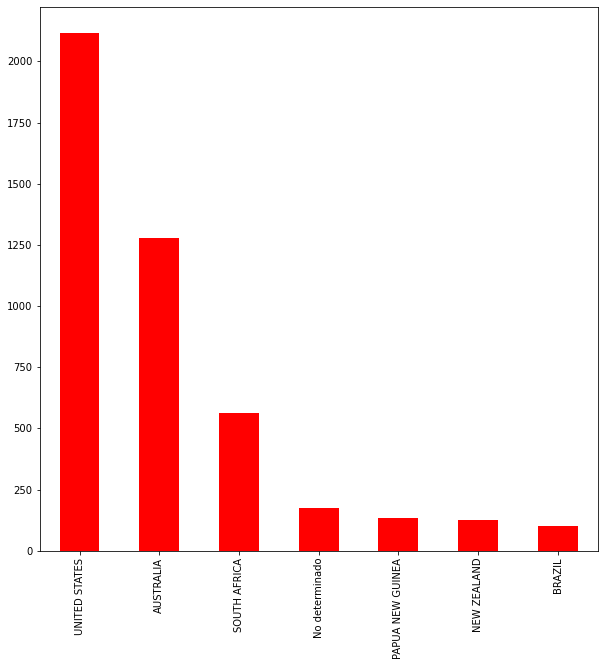

In [280]:
#Pais donde los tiburones son mas violentos
df.groupby("Country").filter(lambda x: len(x) > 100).Country.value_counts().plot.bar(color='red')